0.5 -1 before [<__main__.Node object at 0x7f4659b51f10>]
0.5 -1 before [<__main__.Node object at 0x7f4659b51f10>, <__main__.Node object at 0x7f46589daa10>, <__main__.Node object at 0x7f46588507d0>, <__main__.Node object at 0x7f4658bc1010>, <__main__.Node object at 0x7f4658bc1bd0>]
path: [[0.5, -1], [0.5, 5]]


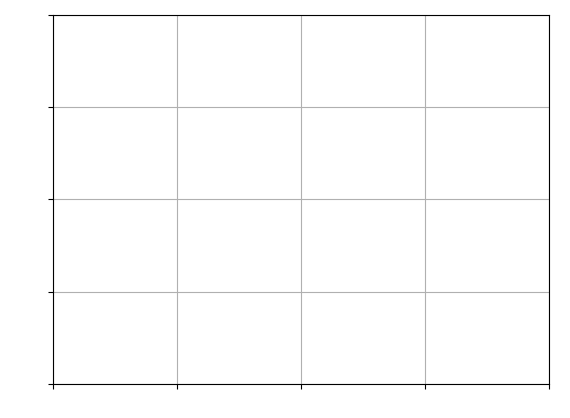

In [14]:
"""
NQLL-p
N-Queens linked lists python version
Dr Keith Reid
CNTW Coding Club
Jan 2024
"""


# libs

import copy
import numpy as np
import matplotlib.pyplot as plt

# classes structs

class Config:
    def __init__(self):
        self.n = get_n()

class Node:
    def __init__(self, x, y, prev, succ):        
        self.x          = x
        self.y          = y
        self.prev       = prev
        self.succ       = succ

# configuration

def get_n():
    n                   = 4
    return n

def get_config():
    config = Config()
    return config

# init

def init_dyad(config):
    n           = config.n
    # name        type  x    y     prev     succ     flav
    alpha       = Node(0.5, -1,   'before', [])
    omega       = Node(0.5,  n+1,  None,    'after')
    alpha.succ  = [omega]
    omega.prev  = alpha
    dyad        = [alpha, omega]
    return dyad

def set_up_board_squares(dyad, config):
    board_squares    = set(dyad)
    for i in range(config.n):
        for j in range(config.n):
            this_queen = Node(i,j,None,[omega])
            board_squares.add(this_queen)
    return board_squares

# model

def count_diagonal_intersections(coords, current):
    coords_x                = coords[0]
    coords_y                = coords[1]
    succ_height             = current.y+1
    height                  = succ_height - coords_y
    left_intersect_x        = coords_x   - height 
    right_intersect_x       = coords_x   + height 
    diagonal_intersections  = [[left_intersect_x, succ_height],[right_intersect_x, succ_height]]
    return diagonal_intersections

def find_successors(base, index, board_squares):
    prior_coords    = read_first_node_path(base)
    taken_xs        = list(set(list([xy[0] for xy in prior_coords])))                                        
    options         = [other   for other   in board_squares if other != index]
    next_ups        = [option  for option  in options       if option.y == index.y+1]
    not_taken       = [next_up for next_up in next_ups      if next_up.x not in taken_xs]
    diag_bans       = []
    for this_xy in prior_coords:
        banned_cells    = count_diagonal_intersections(this_xy, index)
        left_diag_ban   = banned_cells[0][0]
        right_diag_ban  = banned_cells[1][0]
        diag_bans.append(left_diag_ban)
        diag_bans.append(right_diag_ban)
    successors      = set([this_not_taken for this_not_taken in 
                   not_taken if this_not_taken.x not in diag_bans])
    return successors

def read_first_node_path(this_node):
    path           = []
    this_node_xy   = [this_node.x, this_node.y]
    path.append(this_node_xy)
    while this_node.succ != 'after':
        next_node = this_node.succ[0]
        print(next_node)
        next_x    = next_node.x
        next_y    = next_node.y
        next_xy   = [next_x, next_y]
        path.append(next_xy)
        this_node = next_node
    return path

# view
    
def draw(path):
    fig = plt.figure()
    plt.xlim(-0.5, config.n-0.5)
    plt.ylim(-0.5, config.n-0.5)
    ax  = fig.gca()
    ax.set_xticks(np.arange(-0.5, config.n+0.5, 1))
    ax.set_yticks(np.arange(-0.5, config.n+0.5, 1))
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.scatter([p[0] for p in path],[p[1] for p in path])
    plt.grid()
    plt.show()
    
def show_node(this_node):
    print(this_node.x, this_node.y, this_node.prev, this_node.succ)
    
"""            
this_index      = this_base
while this_index.flavour != 'O':
    this_index  = this_index.succ
this_index      = this_index.prev
"""
# control

if __name__=="__main__":
        
    config          = get_config()
    dyad            = init_dyad(config)
    alpha           = dyad[0]
    omega           = dyad[1]
    
    board_squares   = set_up_board_squares(dyad, config)
    
    base            = alpha
    index           = alpha
    successors      = find_successors(alpha, alpha, board_squares)
    
    show_node(alpha)
    
    for this_successor in successors:
        
        alpha.succ.append(this_successor)
    
    show_node(alpha)
        
    path = read_first_node_path(alpha)
    print("path:", path)
    draw(path)
    
    

In [7]:
def test_count_diagonal_intersections():
    coords  = [2,2]
    current = Node(4,3,'_',[])
    diagonal_intersections = count_diagonal_intersections(coords, current)
    assert diagonal_intersections == [[0,4],[4,4]]
    print("Passed read path from node")
    
def test_find_successors():
    config          = get_config()
    dyad            = init_dyad(config)
    alpha           = dyad[0]
    board_squares   = set_up_board_squares(dyad, config)
    base            = alpha
    index           = alpha
    successors      = find_successors(base, index, board_squares)
    assert isinstance(successors, set)
    assert all([isinstance(x, Node) for x in successors])
    assert 0 <= len(successors) <= config.n
    
    config          = get_config()
    config.n        = 5
    dyad            = init_dyad(config)
    alpha           = dyad[0]
    board_squares   = set_up_board_squares(dyad, config)
    base            = alpha
    index           = alpha
    successors      = count_successors(base, index, board_squares)
    assert isinstance(successors, set)
    assert all([isinstance(x, Node) for x in successors])
    assert 0 <= len(successors) <= config.n 
    
    config = get_config()
    
    print("Passed count successors")
    
def test_init_dyad(config):
    dyad = init_dyad(config)
    alpha = dyad[0]
    omega = dyad[1]
    assert isinstance(dyad, list)
    assert isinstance(alpha, Node)
    assert isinstance(omega, Node)
    assert alpha != omega
    assert alpha.flavour == 'A'
    assert omega.flavour == 'O'
    assert alpha.x == 0.5
    assert alpha.y == -1
    assert alpha.succ == omega
    assert omega.prev == alpha
    assert omega.x    == alpha.x
    assert omega.y > alpha.y
    print("Passed init dyad alpha->omega base->terminus")

def test_read_node_path():
    config   = get_config()
    n        = config.n
    dyad     = init_dyad(config)
    alpha    = dyad[0]
    path     = read_node_path(alpha)
    assert path[0] == [0.5,-1]
    assert path[1][0] == 0.5
    dyad         = init_dyad(config)
    alpha        = dyad[0]
    omega        = dyad[1]
    beta         = Node(0, 0, alpha, omega, 'Q')
    alpha.succ   = beta
    omega.prev   = beta
    path         = read_node_path(alpha)
    assert path == [[0.5, -1], [0, 0], [0.5, n+1]]
    dyad         = init_dyad(config)
    alpha        = dyad[0]
    omega        = dyad[1]
    beta         = Node(1, 1, alpha, [omega], 'Q')
    alpha.succ   = beta
    omega.prev   = beta
    path         = read_node_path(alpha)
    assert path == [[0.5, -1], [1, 1], [0.5, n+1]]
    print("Passed read path from node")
    
def test_set_up_board_squares():
    config          = get_config()
    n               = config.n
    dyad            = init_dyad(config)
    board_squares   = set_up_board_squares(dyad, config)
    assert isinstance(board_squares, set)
    assert len(board_squares) == config.n**2 + 2 # alpha and omega are not on the board
    print("passed set up board squares")

def tests():
    test_count_diagonal_intersections()
    test_count_successors()
    test_init_dyad(config)
    test_read_node_path()
    test_set_up_board_squares()
    print("Passed all tests")
    
tests()

TypeError: Node.__init__() takes 5 positional arguments but 6 were given